In [69]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

### <span style="color:#26C;background:#EEE">1.4. 필수 라이브러리와 도구들</span><br>

#### <span style="color:#184;background:#EEE">1.4.1. 주피터 노트북(Jupyter Notebook)</span><br>

- **프로그램 코드를 웹 브라우저에서 실행해주는 대화식 환경**
- **탐색적 데이터 분석에 아주 적합** (많은 사람들이 사용함)
- 참고한 서적도 주피터 노트북으로 작성함
    - 원본 예제 코드 : <https://github.com/rickiepark/introduction_to_ml_with_python>

#### <span style="color:#184;background:#EEE">1.4.2. NumPy(넘파이)</span><br>

- 다차원 배열을 쉽게 다룰 수 있음 (가장 중요)
- 그 외 고수준의 수학 함수 등을 포함
- **NumPy 배열은 싸이킷런의 기본 데이터 구조** (ndarray 클래스) (입출력 모두)

In [70]:
# NumPy 모듈 가져오기
import numpy as np

# NumPy 배열 생성 및 형식화된 출력
x = np.array([[1, 2, 3], [4, 5, 6]])
print(c('x', x))

x:
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]



#### <span style="color:#184;background:#EEE">1.4.3. SciPy(싸이파이)</span><br>

- 과학 계산용 함수 모음
- 고성능 선형 대수, 함수 최적화, 신호 처리, 특수한 수학 함수 등
- **그 중에서도 가장 중요한 scipy.sparse는 희소 행렬 기능을 가짐**
    - 싸이킷런의 데이터를 표현하는 또 다른 방법임

In [71]:
from scipy import sparse

# 대각선만 1이고 나머지는 0인 행렬 생성
eye = np.eye(4)
print(c('NumPy array', eye))

# NumPy 배열을 CSR(compressed sparse row) 형식의 SciPy 희소 행렬로 변환
# 0이 아닌 원소만 저장됨
sparse_matrix = sparse.csr_matrix(eye)
print(c('SciPy sparse CSR matrix', sparse_matrix))

# 희소행렬 직접 만들기 (위의 경우는 거의 없음)
# 샘플 데이터와 그 데이터의 행렬 지수(숫자인덱스)를 생성
data = np.ones(5) * -99
row_indices = np.arange(5)
col_indices = np.arange(5)

print(c('data', data))
print(c('row_indices', row_indices))
print(c('col_indices', col_indices))

# NumPy 배열을 COO(Coordinate) 포멧의 SciPy sparse 행렬로 변경
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print(c('COO representation', eye_coo))

NumPy array:
<class 'numpy.ndarray'>
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

SciPy sparse CSR matrix:
<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0

data:
<class 'numpy.ndarray'>
[-99. -99. -99. -99. -99.]

row_indices:
<class 'numpy.ndarray'>
[0 1 2 3 4]

col_indices:
<class 'numpy.ndarray'>
[0 1 2 3 4]

COO representation:
<class 'scipy.sparse.coo.coo_matrix'>
  (0, 0)	-99.0
  (1, 1)	-99.0
  (2, 2)	-99.0
  (3, 3)	-99.0
  (4, 4)	-99.0



#### <span style="color:#184;background:#EEE">1.4.4. matplotlib</span><br>

- 과학 계산용 그래프 라이브러리
- 선 그래프, 히스토그램, 산점도 등
- **데이터와 분석 결과를 시각화하면 새로운 통찰력을 제공해줌**

x:
<class 'numpy.ndarray'>
[-10.   -9.8  -9.6  -9.4  -9.2  -9.   -8.8  -8.6  -8.4  -8.2  -8.   -7.8
  -7.6  -7.4  -7.2  -7.   -6.8  -6.6  -6.4  -6.2  -6.   -5.8  -5.6  -5.4
  -5.2  -5.   -4.8  -4.6  -4.4  -4.2  -4.   -3.8  -3.6  -3.4  -3.2  -3.
  -2.8  -2.6  -2.4  -2.2  -2.   -1.8  -1.6  -1.4  -1.2  -1.   -0.8  -0.6
  -0.4  -0.2   0.    0.2   0.4   0.6   0.8   1.    1.2   1.4   1.6   1.8
   2.    2.2   2.4   2.6   2.8   3.    3.2   3.4   3.6   3.8   4.    4.2
   4.4   4.6   4.8   5.    5.2   5.4   5.6   5.8   6.    6.2   6.4   6.6
   6.8   7.    7.2   7.4   7.6   7.8   8.    8.2   8.4   8.6   8.8   9.
   9.2   9.4   9.6   9.8  10. ]

y:
<class 'numpy.ndarray'>
[ 0.54402111  0.36647913  0.17432678 -0.02477543 -0.22288991 -0.41211849
 -0.58491719 -0.7343971  -0.85459891 -0.94073056 -0.98935825 -0.99854335
 -0.96791967 -0.8987081  -0.79366786 -0.6569866  -0.49411335 -0.31154136
 -0.1165492   0.0830894   0.2794155   0.46460218  0.63126664  0.77276449
  0.88345466  0.95892427  0.99616461  0

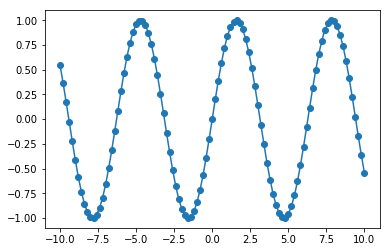

In [72]:
# 파이썬의 rich output(이미지, 도표 등)을
# 브라우저에서 바로 확인하겠다는 선언 --> plt.show() 명령이 필요 없음
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt

# -10 ~ 10 사이를 101단계로 나타낸 배열 (입력)
x = np.linspace(-10, 10, 101)
# 사인 함수 적용 (출력)
y = np.sin(x)

print(c('x', x))
print(c('y', y))

# 그래프 그리기
plt.plot(x, y, marker='o')

#### <span style="color:#184;background:#EEE">1.4.5. pandas</span><br>

- 데이터 처리와 분석을 위한 파이썬 라이브러리
- **액셀의 스프레드시트와 비슷한 테이블 형태로 다룸**
    - 각 열의 타입이 달라도 됨 (테이블의 속성(Attribute))
    - SQL(Structured Query Language) 지원

In [73]:
import pandas as pd
from IPython.display import display

# create a simple dataset of people
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Location': ['New York', 'Paris', 'Berlin', 'London'],
    'Age': [24, 13, 53, 33]
}

data_pandas = pd.DataFrame(data)

# IPython.display는 주피터 노트북에서
# 데이터 프레임을 "아름답게" 출력해줌
display(data_pandas)
print(c('data_pandas', data_pandas)) # 일반 출력과 비교

# 질의 예시
display(data_pandas[data_pandas.Age > 30])

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


data_pandas:
<class 'pandas.core.frame.DataFrame'>
   Age  Location   Name
0   24  New York   John
1   13     Paris   Anna
2   53    Berlin  Peter
3   33    London  Linda



,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


#### <span style="color:#184;background:#EEE">1.4.6. mglearn</span><br>

- **참고 서적을 위해 별도로 만든 라이브러리**
- 그래프나 데이터 적재와 관련한 세세한 코드를 일일이 쓰지 않아도 되게끔 함<br><br>

- <span style="color:#C22">앞으로 다음 모듈은 많이 쓰게 될 것</span>

In [74]:
# numpy 모듈
import numpy as np

# scipy 모듈의 sparse 함수
from scipy import sparse

# matplotlib.pyplot 모듈
import matplotlib.pyplot as plt

# pandas 모듈
# 보조용 IPython.display 모듈
import pandas as pd
from IPython.display import display

# mglearn 모듈
# 경로 문제 때문에 sys 모듈을 가져옴
import sys
sys.path.append('..')
import mglearn